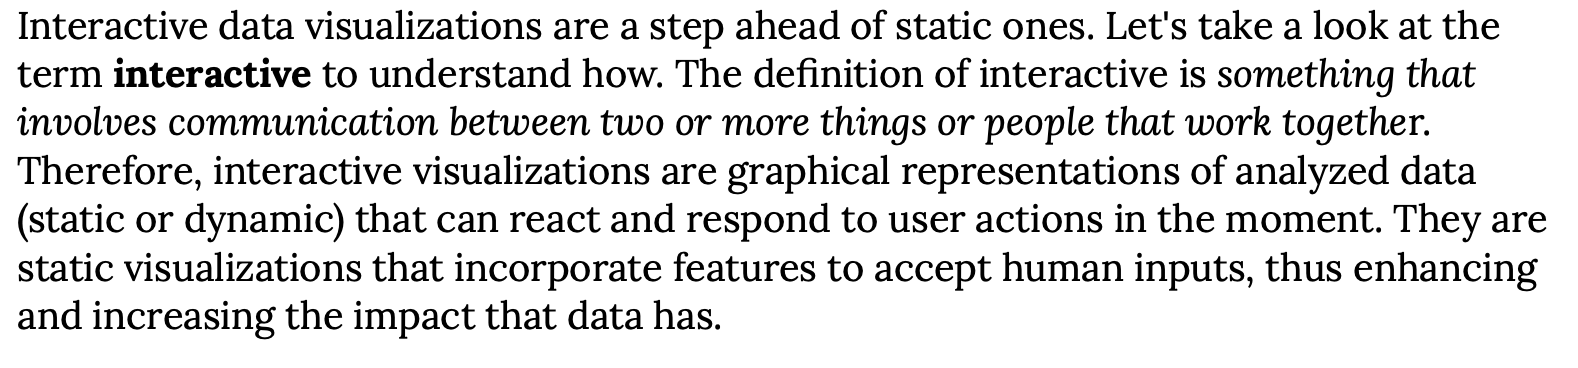

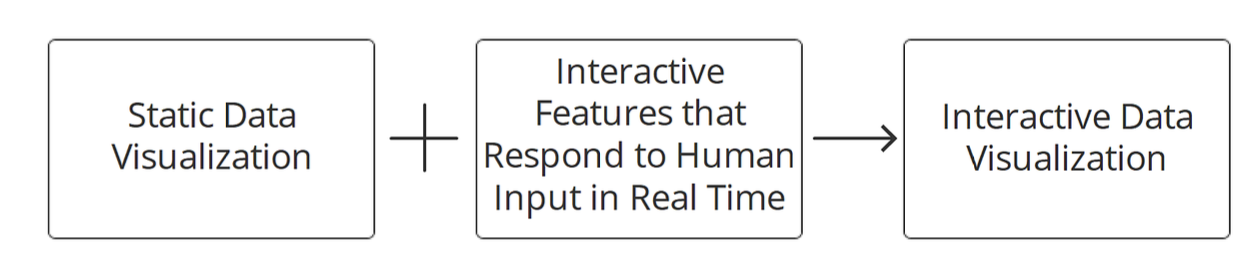

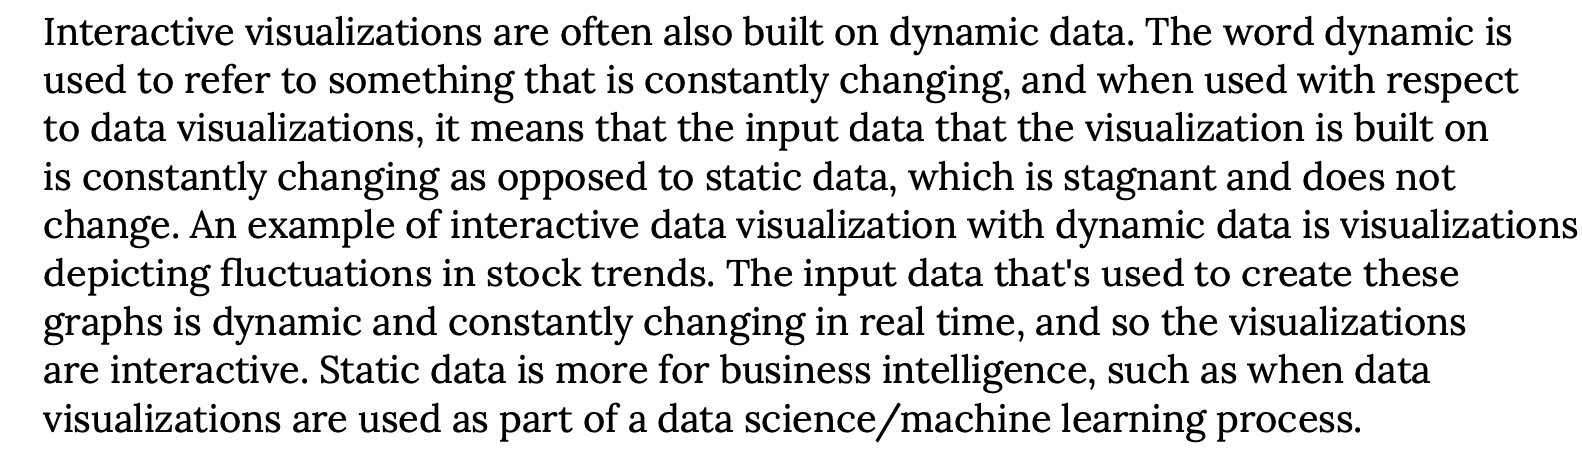

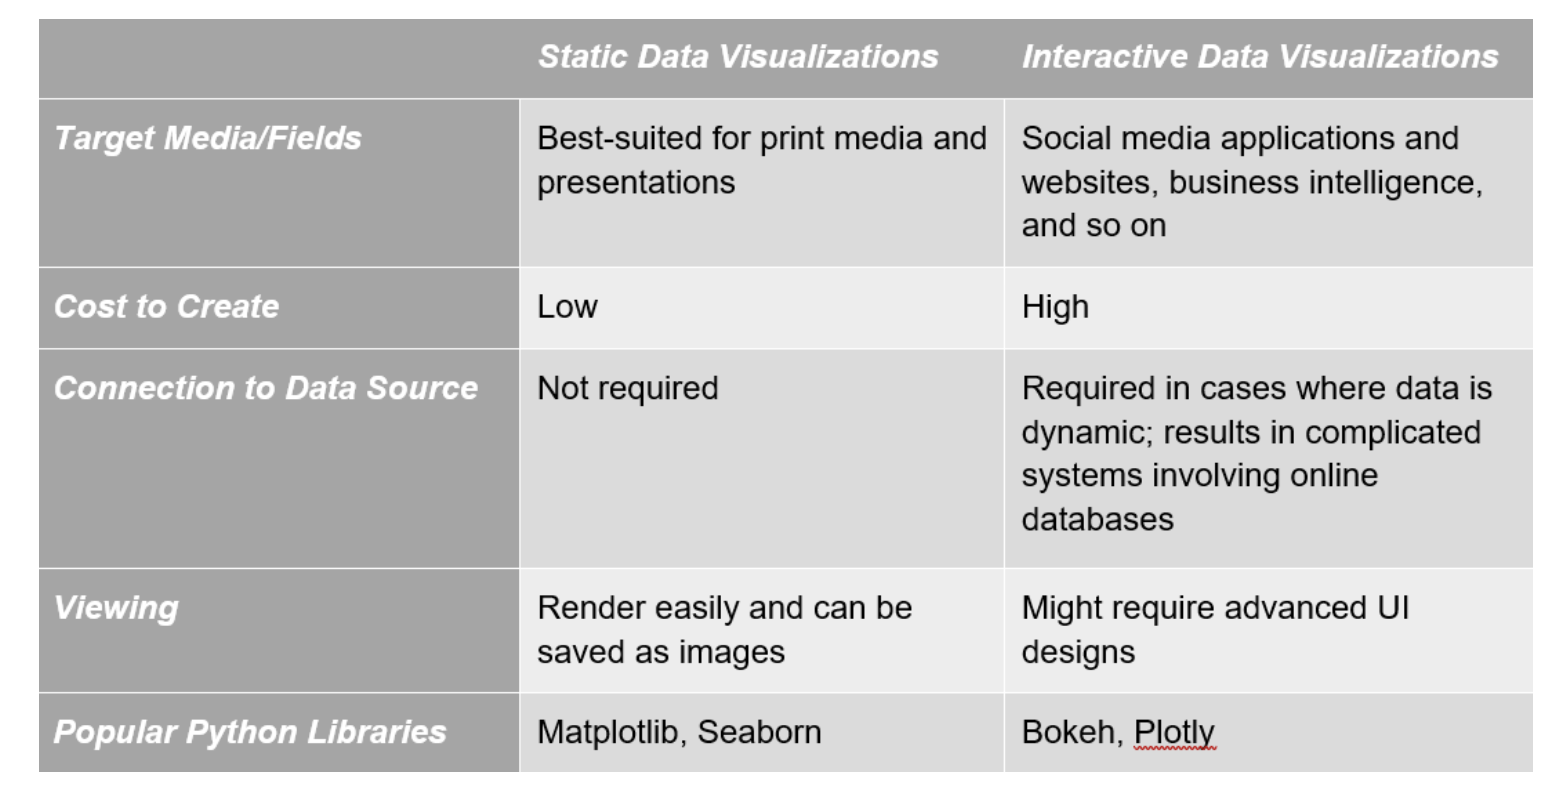

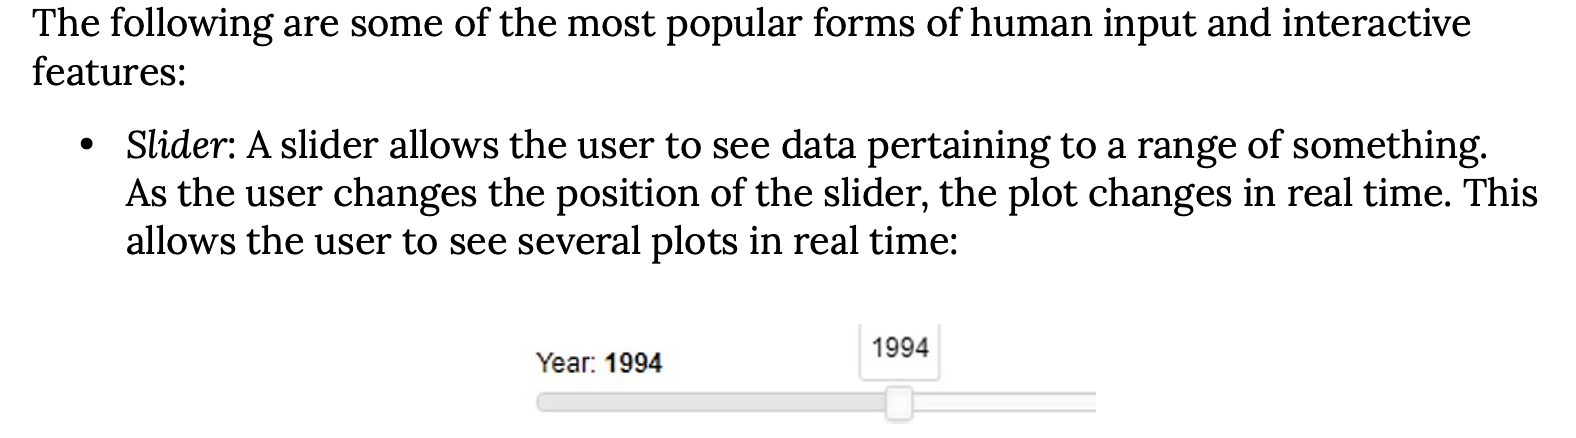

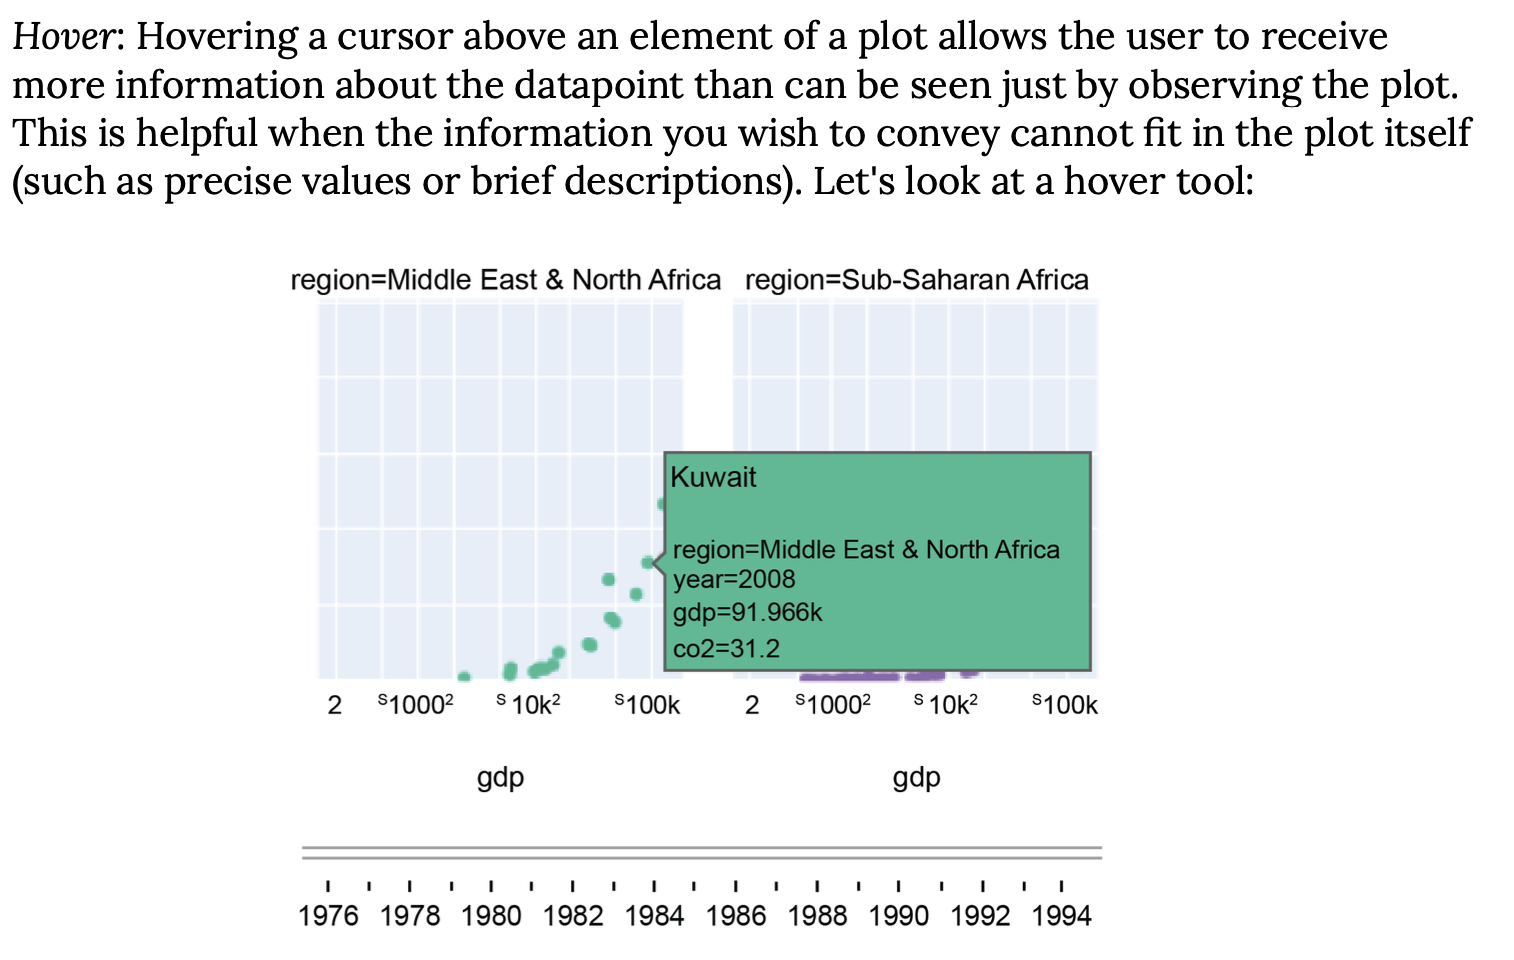

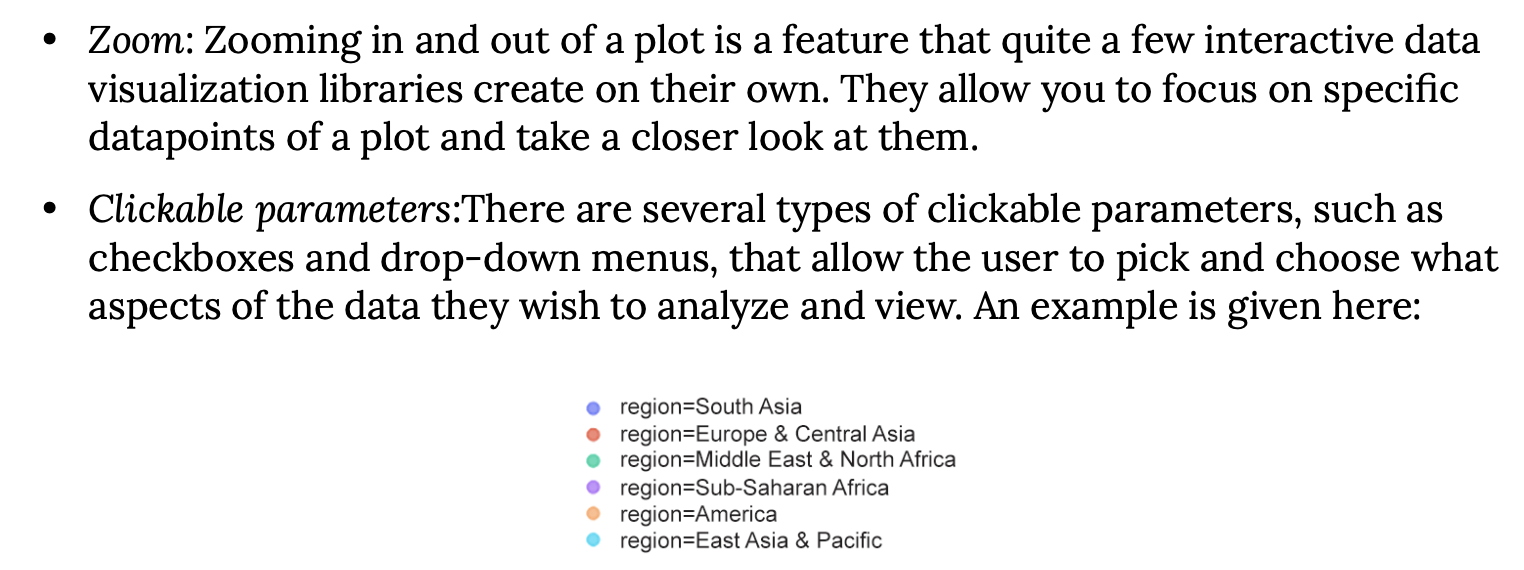

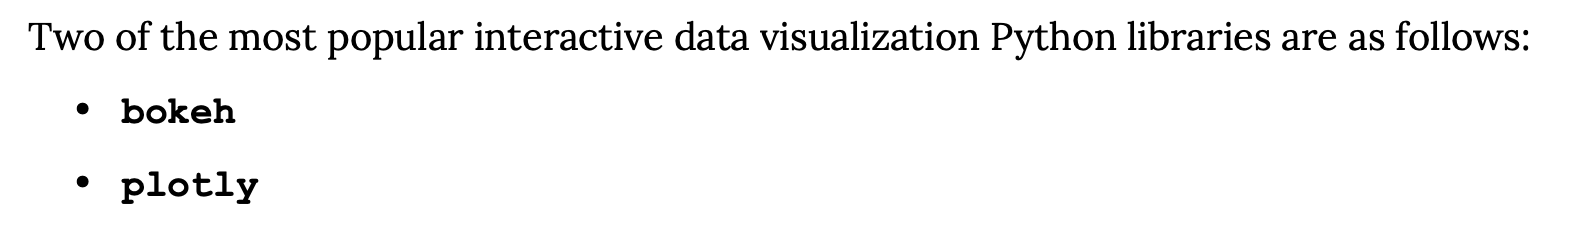

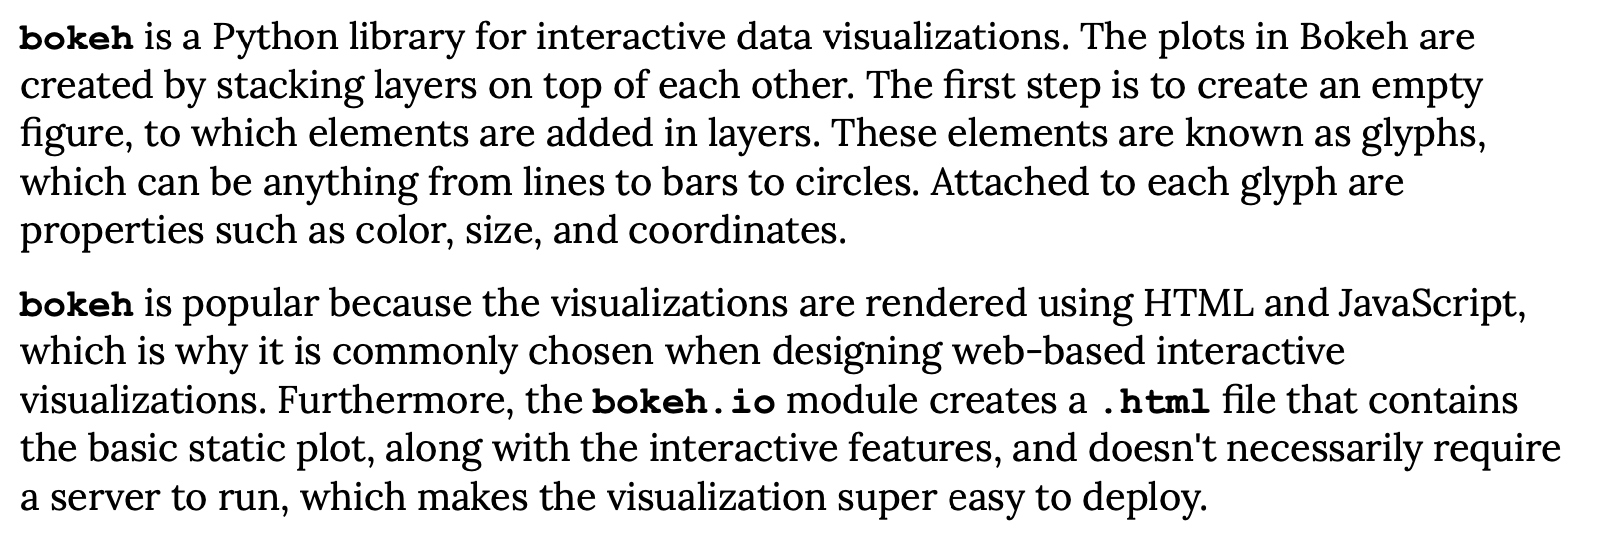

In [1]:
import pandas as pd
import numpy as np

co2 = pd.read_csv('co2.csv')
gm = pd.read_csv('gapminder.csv')

In [2]:
print (co2.head())

       country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0  Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1      Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2      Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3      Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4       Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

     2005    2006    2007   2008   2009   2010   2011  2012   2013   2014  
0  0.0529  0.0637  0.0854  0.154  0.242  0.294  0.412  0.35  0.316  0.299  
1  1.3800  1.2800  1.3000  1.460  1.480  1.560  1.790  1.68  1.730  1.960  
2  3.2200  2.9900  3.1900  3.160  3.420  3.300  3.290  3.46  3.510  3.720  
3  7.3000  6.7500  6.5200  6.430  6.120  6.120  5.870  5.92  5.900  5.830  
4  0.9800  1.1000  1.2000  1.180  1.230  1.240  1.250  1.33  1.250  1.290  

[5 rows x 216 columns]


In [3]:
gm.head()

# you can see there are duplicate rows in gm data frame

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia


In [4]:
# Use .drop_duplicates() to remove the duplicate instances from the gm DataFrame 
# and save this in a new DataFrame called df_gm:
df_gm = gm[['Country', 'region']].drop_duplicates()

In [5]:
df_gm.head()

,Country,region
0,Afghanistan,South Asia
50,Albania,Europe & Central Asia
100,Algeria,Middle East & North Africa
150,Angola,Sub-Saharan Africa
200,Antigua and Barbuda,America


In [6]:
# Use .merge() to combine the co2 DataFrame with the df_gm DataFrame. 
# This merge function basically performs an inner join on the two DataFrames (the same
# as the inner join when used in databases). 
# This merge is necessary to ensure that both the co2 DataFrame and the gm DataFrame consist of the same countries,
# thus guaranteeing that the values of the CO2 emissions will correspond to their respective countries:

df_w_regions = pd.merge(co2, df_gm, left_on ='country', right_on='Country', how ='inner')

# left_on='country': 
    # 'country' column from the co2 DataFrame will be used as the key for merging.
# right_on='Country': 
    # 'Country' column from the df_gm DataFrame will be used as the key for merging.
# how='inner': 
    # specifies the type of merge to perform. 'Inner' merge means that only the rows with matching values in both DataFrames will be included in the result.

In [7]:
df_w_regions

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,Country,region
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0854,0.154,0.242,0.294,0.412,0.350,0.316,0.299,Afghanistan,South Asia
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3000,1.460,1.480,1.560,1.790,1.680,1.730,1.960,Albania,Europe & Central Asia
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.1900,3.160,3.420,3.300,3.290,3.460,3.510,3.720,Algeria,Middle East & North Africa
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2000,1.180,1.230,1.240,1.250,1.330,1.250,1.290,Angola,Sub-Saharan Africa
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.1400,5.190,5.450,5.540,5.360,5.420,5.360,5.380,Antigua and Barbuda,America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Vanuatu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4500,0.423,0.524,0.512,0.546,0.459,0.420,0.595,Vanuatu,East Asia & Pacific
169,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.8100,6.360,6.290,6.510,6.000,6.650,6.070,6.030,Venezuela,America
170,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2200,1.360,1.470,1.610,1.700,1.570,1.610,1.800,Vietnam,East Asia & Pacific
171,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1520,0.166,0.186,0.194,0.206,0.249,0.261,0.288,Zambia,Sub-Saharan Africa


In [8]:
# Drop one of the country columns since there are two:
df_w_regions = df_w_regions.drop('Country', axis='columns')

In [9]:
df_w_regions

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,region
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0637,0.0854,0.154,0.242,0.294,0.412,0.350,0.316,0.299,South Asia
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2800,1.3000,1.460,1.480,1.560,1.790,1.680,1.730,1.960,Europe & Central Asia
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.9900,3.1900,3.160,3.420,3.300,3.290,3.460,3.510,3.720,Middle East & North Africa
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1000,1.2000,1.180,1.230,1.240,1.250,1.330,1.250,1.290,Sub-Saharan Africa
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.9100,5.1400,5.190,5.450,5.540,5.360,5.420,5.360,5.380,America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Vanuatu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2220,0.4500,0.423,0.524,0.512,0.546,0.459,0.420,0.595,East Asia & Pacific
169,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.2200,5.8100,6.360,6.290,6.510,6.000,6.650,6.070,6.030,America
170,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2100,1.2200,1.360,1.470,1.610,1.700,1.570,1.610,1.800,East Asia & Pacific
171,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1850,0.1520,0.166,0.186,0.194,0.206,0.249,0.261,0.288,Sub-Saharan Africa


In [10]:
df_w_regions.shape

(173, 217)

In [11]:
new_co2 = pd.melt(df_w_regions, id_vars=['country', 'region'])

# pd.melt(): This function is used to reshape or transform a DataFrame from wide format to long format.
# df_w_regions: 
    #This is the DataFrame to be reshaped.
# id_vars=['country', 'region']: 
    # This parameter specifies the columns that will remain unchanged during the transformation process. 
    # In this case, 'country' and 'region' columns will be retained without any changes.
    # So, after executing this command, the resulting DataFrame new_co2 will have the 'country' and 'region' columns preserved 
    # as they are, while other columns will be melted down into two new columns: one containing the variable names 
    # and another containing their corresponding values. 
    # This is typically done to make the DataFrame more suitable for certain types of analysis or visualization tasks.
new_co2

,country,region,variable,value
0,Afghanistan,South Asia,1800,NaN
1,Albania,Europe & Central Asia,1800,NaN
2,Algeria,Middle East & North Africa,1800,NaN
3,Angola,Sub-Saharan Africa,1800,NaN
4,Antigua and Barbuda,America,1800,NaN
...,...,...,...,...
37190,Vanuatu,East Asia & Pacific,2014,0.595
37191,Venezuela,America,2014,6.030
37192,Vietnam,East Asia & Pacific,2014,1.800
37193,Zambia,Sub-Saharan Africa,2014,0.288


In [12]:
columns = ['country', 'region', 'year', 'co2']
new_co2.columns = columns
new_co2

,country,region,year,co2
0,Afghanistan,South Asia,1800,NaN
1,Albania,Europe & Central Asia,1800,NaN
2,Algeria,Middle East & North Africa,1800,NaN
3,Angola,Sub-Saharan Africa,1800,NaN
4,Antigua and Barbuda,America,1800,NaN
...,...,...,...,...
37190,Vanuatu,East Asia & Pacific,2014,0.595
37191,Venezuela,America,2014,6.030
37192,Vietnam,East Asia & Pacific,2014,1.800
37193,Zambia,Sub-Saharan Africa,2014,0.288


In [13]:
# convery year to int type
new_co2['year'] = new_co2['year'].astype('int64')
# select data from 1960
df_co2 = new_co2[new_co2['year'].astype('int64') >= 1960]
df_co2 = df_co2.sort_values(by=['country', 'year'])
df_co2.head()

,country,region,year,co2
27680,Afghanistan,South Asia,1960,0.0461
27853,Afghanistan,South Asia,1961,0.0536
28026,Afghanistan,South Asia,1962,0.0738
28199,Afghanistan,South Asia,1963,0.0742
28372,Afghanistan,South Asia,1964,0.0863


In [14]:
# create a data frame for gdp also
df_gdp = gm[['Country', 'Year', 'gdp']]
df_gdp.columns = ['country', 'year', 'gdp']
df_gdp.head()

,country,year,gdp
0,Afghanistan,1964,1182.0
1,Afghanistan,1965,1182.0
2,Afghanistan,1966,1168.0
3,Afghanistan,1967,1173.0
4,Afghanistan,1968,1187.0


In [15]:
# Merge the two DataFrames together by using the .merge() function on the
# country and year columns. Store this in a new DataFrame called data. 
# Use the dropna() function to drop the NaN values and the head() function to print the first five rows.
data = pd.merge(df_co2, df_gdp, on=['country', 'year'], how='left')
data

,country,region,year,co2,gdp
0,Afghanistan,South Asia,1960,0.0461,NaN
1,Afghanistan,South Asia,1961,0.0536,NaN
2,Afghanistan,South Asia,1962,0.0738,NaN
3,Afghanistan,South Asia,1963,0.0742,NaN
4,Afghanistan,South Asia,1964,0.0863,1182.0
...,...,...,...,...,...
9510,Zimbabwe,Sub-Saharan Africa,2010,0.5520,1484.0
9511,Zimbabwe,Sub-Saharan Africa,2011,0.6650,1626.0
9512,Zimbabwe,Sub-Saharan Africa,2012,0.5300,1750.0
9513,Zimbabwe,Sub-Saharan Africa,2013,0.7760,1773.0


In [16]:
data = data.dropna()
data.head()

,country,region,year,co2,gdp
4,Afghanistan,South Asia,1964,0.0863,1182.0
5,Afghanistan,South Asia,1965,0.1010,1182.0
6,Afghanistan,South Asia,1966,0.1080,1168.0
7,Afghanistan,South Asia,1967,0.1240,1173.0
8,Afghanistan,South Asia,1968,0.1160,1187.0


In [17]:
# Let's plot a simple line plot for carbon emmisions in India
data_india_year = data.year[data['country'] == 'India']
data_india_co2 = data.co2[data['country'] == 'India']

In [18]:
# If you use Jupyter notebooks, call Bokeh’s output_notebook() function in your code. 
# Then, use the show() function to display your visualization right inside your notebook

from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [19]:
from bokeh.plotting import figure, show

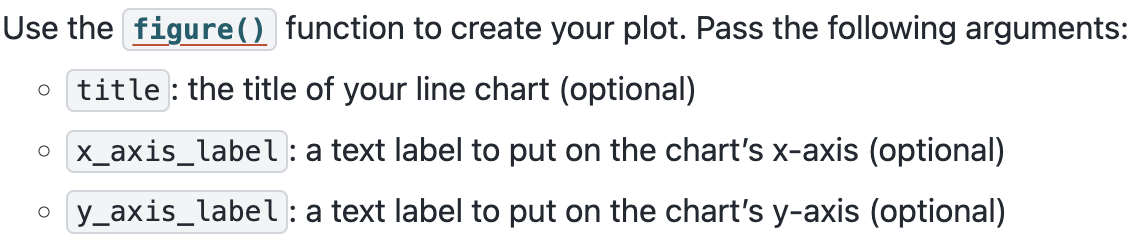

In [20]:
# create a new plot with a title and axis labels
p = figure(title="CO2 emissions", x_axis_label='Year', y_axis_label='CO2 Emissions')

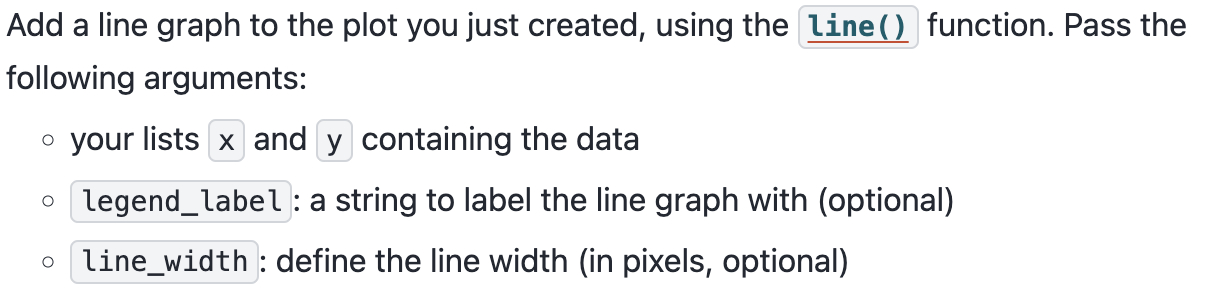

In [21]:
# add a line renderer with legend and line thickness to the plot
p.line(data_india_year, data_india_co2, legend_label="CO2 Emissions in India", line_width=2, color='blue')

# This identifier is used internally by Bokeh to keep track of the object and to facilitate interactions with it.

GlyphRenderer(id='p1036', ...)

In [22]:
# show the results
show(p)

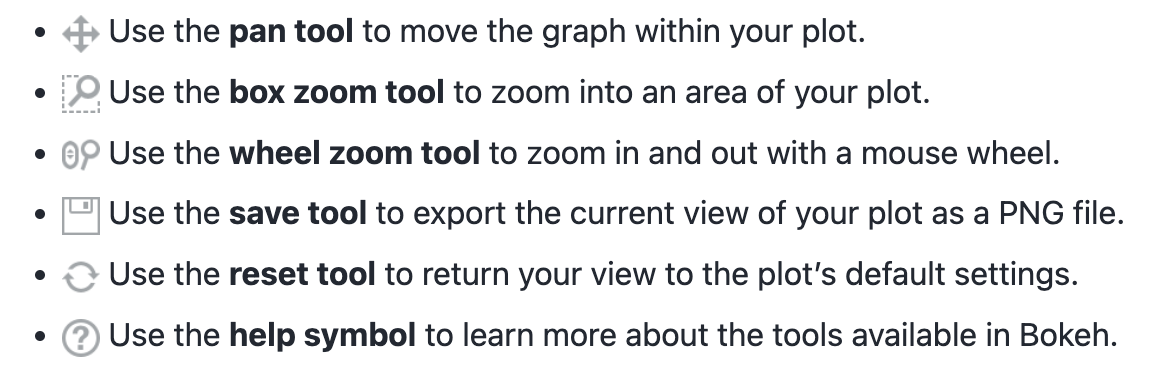

In [23]:
# let's show the CO2 emissions in Germany alongside that of India
data_germany_year = data.year[data['country'] == 'Germany']
data_germany_co2 = data.co2[data['country'] == 'Germany']

In [24]:
p.line(data_germany_year, data_germany_co2, legend_label="CO2 Emissions in Germany", line_width=2, color='red')

GlyphRenderer(id='p1051', ...)

In [25]:
show(p)

In [26]:
# D--I--Y
# Add CO2 emissions of any two countries in the above plot
data['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Denmark', 'Djibouti', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'I

In [27]:
# scatter plot between gdp and co2 emissions in India
data_india_gdp = data.gdp[data['country'] == 'India']

In [28]:
p1 = figure(title="CO2 V/S GDP", x_axis_label='GDP', y_axis_label='CO2 Emissions')
p1.scatter(data_india_gdp, data_india_co2,legend_label="co2 v/s gdp of India", color="orange", size=12)

GlyphRenderer(id='p1096', ...)

In [29]:
show(p1)

In [30]:
data_germany_gdp = data.gdp[data['country'] == 'Germany']
p1.scatter(data_germany_gdp, data_germany_co2,legend_label="co2 v/s gdp of Germany", color="purple", size=12)
show(p1)

In [31]:
p1.legend.location = "top_left"
show(p1)

In [32]:
# legend properties
p1.legend.label_text_font = "times"
p1.legend.label_text_font_style = "italic"
p1.legend.label_text_color = "navy"

# change border and background of legend
p1.legend.border_line_width = 3
p1.legend.border_line_color = "navy"

p1.legend.location = "top_left"
show(p1)

In [33]:
# more customization of plot
from bokeh.io import curdoc
curdoc().theme = "dark_minimal"
p1.legend.label_text_color = "white"
show(p1)

In [34]:
#D--I--Y
# Make p1 plot with different themes
# caliber, dark_minimal, light_minimal, night_sky, and contrast
# https://docs.bokeh.org/en/latest/docs/user_guide/styling/themes.html#ug-styling-using-themes



In [35]:
# width and height of plot
p1 = figure(title="CO2 V/S GDP", x_axis_label='GDP', y_axis_label='CO2 Emissions', width=800, height=800)
p1.scatter(data_india_gdp, data_india_co2,legend_label="co2 v/s gdp of India", color="orange", size=12)
p1.scatter(data_germany_gdp, data_germany_co2,legend_label="co2 v/s gdp of Germany", color="purple", size=12)
p1.legend.location = "top_left"
show(p1)

In [36]:
# automatic re-sizing of plot
p1 = figure(title="CO2 V/S GDP", x_axis_label='GDP', y_axis_label='CO2 Emissions', sizing_mode='stretch_width', height=600)
p1.scatter(data_india_gdp, data_india_co2,legend_label="co2 v/s gdp of India", color="orange", size=12)
p1.scatter(data_germany_gdp, data_germany_co2,legend_label="co2 v/s gdp of Germany", color="purple", size=12)
p1.legend.location = "top_left"
show(p1)

In [37]:
# customizing axis appearance
curdoc().theme = "caliber"
p1 = figure(title="CO2 V/S GDP", x_axis_label='GDP', y_axis_label='CO2 Emissions', sizing_mode='stretch_width', height=600)
p1.scatter(data_india_gdp, data_india_co2,legend_label="co2 v/s gdp of India", color="orange", size=12)
p1.legend.location = "top_left"
# x-axis
p1.xaxis.axis_label = "Gross Domestic Product"
p1.xaxis.axis_line_width = 3
p1.xaxis.axis_line_color = "red"
p1.xaxis.major_label_text_color = "red"
p1.xaxis.major_label_orientation = 'horizontal'   # horizontal, vertical, parallel, normal
# y-axis
p1.yaxis.axis_label = "Carbon Dioxide Emissions"
p1.yaxis.axis_line_width = 3
p1.yaxis.axis_line_color = "blue"
p1.yaxis.major_label_text_color = "blue"
p1.yaxis.major_label_orientation = 'horizontal'

show(p1)

In [38]:
# customizing axis appearance
curdoc().theme = "caliber"
p1 = figure(title="CO2 V/S GDP", x_axis_label='GDP', y_axis_label='CO2 Emissions', sizing_mode='stretch_width', height=600)
p1.scatter(data_india_gdp, data_india_co2,legend_label="co2 v/s gdp of India", color="orange", size=12)
p1.legend.location = "top_left"
# x-axis
p1.xaxis.axis_label = "Gross Domestic Product"
p1.xaxis.axis_line_width = 3
p1.xaxis.axis_line_color = "red"
p1.xaxis.major_label_text_color = "red"
p1.xaxis.major_label_orientation = 'horizontal'   # horizontal, vertical, parallel, normal
# y-axis
p1.yaxis.axis_label = "Carbon Dioxide Emissions"
p1.yaxis.axis_line_width = 3
p1.yaxis.axis_line_color = "blue"
p1.yaxis.major_label_text_color = "blue"
p1.yaxis.major_label_orientation = 'horizontal'

# change things only on the x-grid
p1.xgrid.grid_line_color = "red"

# change things only on the y-grid
p1.ygrid.grid_line_dash = [6, 4] # The [6, 4] specifies a dash pattern where the grid lines are drawn with dashes of length 6 followed by gaps of length 4. 
p1.ygrid.grid_line_color = 'blue'


show(p1)


In [39]:
# customizing axis appearance
curdoc().theme = "caliber"
p1 = figure(title="CO2 V/S GDP", x_axis_label='GDP', y_axis_label='CO2 Emissions', sizing_mode='stretch_width', height=600)
p1.scatter(data_india_gdp, data_india_co2,legend_label="co2 v/s gdp of India", color="orange", size=12)
p1.legend.location = "top_left"
# x-axis
p1.xaxis.axis_label = "Gross Domestic Product"
p1.xaxis.axis_line_width = 3
p1.xaxis.axis_line_color = "red"
p1.xaxis.major_label_text_color = "red"
p1.xaxis.major_label_orientation = 'horizontal'   # horizontal, vertical, parallel, normal
# y-axis
p1.yaxis.axis_label = "Carbon Dioxide Emissions"
p1.yaxis.axis_line_width = 3
p1.yaxis.axis_line_color = "blue"
p1.yaxis.major_label_text_color = "blue"
p1.yaxis.major_label_orientation = 'horizontal'

# change things only on the x-grid
p1.xgrid.grid_line_color = "red"

# change things only on the y-grid
p1.ygrid.grid_line_dash = [6, 4] # The [6, 4] specifies a dash pattern where the grid lines are drawn with dashes of length 6 followed by gaps of length 4. 
p1.ygrid.grid_line_color = 'blue'

# bands 
p1.ygrid.band_fill_color = "olive"
p1.ygrid.band_fill_alpha = 0.2 # Increasing the alpha value would make the fill less transparent, while decreasing it would make it more transparent.


show(p1)


In [40]:
# instead of copying the whole code, just add new customization and call show() function
p1.toolbar_location = 'below'

show(p1)

In [41]:
p1.toolbar_location = 'below'
p1.toolbar.autohide = True

show(p1)

In [42]:
# hover tools
from bokeh.models import HoverTool

curdoc().theme = "caliber"

p1 = figure(
    title="CO2 V/S GDP", 
    x_axis_label='GDP', 
    y_axis_label='CO2 Emissions', 
    sizing_mode='stretch_width', 
    height=600,
    tools=[HoverTool()],
    tooltips="GDP: @x, CO2 emission: @y")  # hover tool

p1.scatter(data_india_gdp, data_india_co2,legend_label="co2 v/s gdp of India", color="orange", size=12)
p1.legend.location = "top_left"
# x-axis
p1.xaxis.axis_label = "Gross Domestic Product"
p1.xaxis.axis_line_width = 3
p1.xaxis.axis_line_color = "red"
p1.xaxis.major_label_text_color = "red"
p1.xaxis.major_label_orientation = 'horizontal'   # horizontal, vertical, parallel, normal
# y-axis
p1.yaxis.axis_label = "Carbon Dioxide Emissions"
p1.yaxis.axis_line_width = 3
p1.yaxis.axis_line_color = "blue"
p1.yaxis.major_label_text_color = "blue"
p1.yaxis.major_label_orientation = 'horizontal'

# change things only on the x-grid
p1.xgrid.grid_line_color = "red"

# change things only on the y-grid
p1.ygrid.grid_line_dash = [6, 4] # The [6, 4] specifies a dash pattern where the grid lines are drawn with dashes of length 6 followed by gaps of length 4. 
p1.ygrid.grid_line_color = 'blue'

# bands 
p1.ygrid.band_fill_color = "olive"
p1.ygrid.band_fill_alpha = 0.2 # Increasing the alpha value would make the fill less transparent, while decreasing it would make it more transparent.

# toolbar location
p1.toolbar_location = 'below'
p1.toolbar.autohide = True

show(p1)


In [43]:
# displaying all tools since previously using hovertool vanishes other tools
from bokeh.models import HoverTool, BoxZoomTool, PanTool, ResetTool

curdoc().theme = "caliber"

p1 = figure(
    title="CO2 V/S GDP", 
    x_axis_label='GDP', 
    y_axis_label='CO2 Emissions', 
    sizing_mode='stretch_width', 
    height=600,
    tools=[HoverTool(),BoxZoomTool(),PanTool(), ResetTool()],   
    tooltips="GDP: @x, CO2 emission: @y")  # hover tool

p1.scatter(data_india_gdp, data_india_co2,legend_label="co2 v/s gdp of India", color="orange", size=12)
p1.legend.location = "top_left"
# x-axis
p1.xaxis.axis_label = "Gross Domestic Product"
p1.xaxis.axis_line_width = 3
p1.xaxis.axis_line_color = "red"
p1.xaxis.major_label_text_color = "red"
p1.xaxis.major_label_orientation = 'horizontal'   # horizontal, vertical, parallel, normal
# y-axis
p1.yaxis.axis_label = "Carbon Dioxide Emissions"
p1.yaxis.axis_line_width = 3
p1.yaxis.axis_line_color = "blue"
p1.yaxis.major_label_text_color = "blue"
p1.yaxis.major_label_orientation = 'horizontal'

# change things only on the x-grid
p1.xgrid.grid_line_color = "red"

# change things only on the y-grid
p1.ygrid.grid_line_dash = [6, 4] # The [6, 4] specifies a dash pattern where the grid lines are drawn with dashes of length 6 followed by gaps of length 4. 
p1.ygrid.grid_line_color = 'blue'

# bands 
p1.ygrid.band_fill_color = "olive"
p1.ygrid.band_fill_alpha = 0.2 # Increasing the alpha value would make the fill less transparent, while decreasing it would make it more transparent.

# toolbar location
p1.toolbar_location = 'below'
p1.toolbar.autohide = True

show(p1)


In [44]:
from bokeh.transform import linear_cmap
from bokeh.palettes import Turbo256
from bokeh.palettes import Inferno256

# create linear color mapper
mapper = linear_cmap(field_name="y", palette=Inferno256, low=min(data_india_co2), high=max(data_india_co2))

p1 = figure(
    title="CO2 V/S GDP", 
    x_axis_label='GDP', 
    y_axis_label='CO2 Emissions', 
    sizing_mode='stretch_width', 
    height=600,
    tools=[HoverTool(),BoxZoomTool(),PanTool(), ResetTool()],   
    tooltips="GDP: @x, CO2 emission: @y")  # hover tool

p1.scatter(data_india_gdp, data_india_co2,legend_label="co2 v/s gdp of India", color=mapper, size=12)
p1.legend.location = "top_left"
# x-axis
p1.xaxis.axis_label = "Gross Domestic Product"
p1.xaxis.axis_line_width = 3
p1.xaxis.axis_line_color = "red"
p1.xaxis.major_label_text_color = "red"
p1.xaxis.major_label_orientation = 'horizontal'   # horizontal, vertical, parallel, normal
# y-axis
p1.yaxis.axis_label = "Carbon Dioxide Emissions"
p1.yaxis.axis_line_width = 3
p1.yaxis.axis_line_color = "blue"
p1.yaxis.major_label_text_color = "blue"
p1.yaxis.major_label_orientation = 'horizontal'

# change things only on the x-grid
p1.xgrid.grid_line_color = "red"

# change things only on the y-grid
p1.ygrid.grid_line_dash = [6, 4] # The [6, 4] specifies a dash pattern where the grid lines are drawn with dashes of length 6 followed by gaps of length 4. 
p1.ygrid.grid_line_color = 'blue'

# bands 
p1.ygrid.band_fill_color = "olive"
p1.ygrid.band_fill_alpha = 0.05 # Increasing the alpha value would make the fill less transparent, while decreasing it would make it more transparent.

# toolbar location
p1.toolbar_location = 'below'
p1.toolbar.autohide = True

show(p1)


In [45]:
# read from https://docs.bokeh.org/en/latest/docs/reference/palettes.html#module-bokeh.palettes

In [46]:
# save your plots as HTML file
from bokeh.plotting import output_file, save

output_file(filename="co2_vs_gdp_india.html", title="CO2 VS GDP INDIA")


# create linear color mapper
mapper = linear_cmap(field_name="y", palette=Inferno256, low=min(data_india_co2), high=max(data_india_co2))

p1 = figure(
    title="CO2 V/S GDP", 
    x_axis_label='GDP', 
    y_axis_label='CO2 Emissions', 
    sizing_mode='stretch_width', 
    height=600,
    tools=[HoverTool(),BoxZoomTool(),PanTool(), ResetTool()],   
    tooltips="GDP: @x, CO2 emission: @y")  # hover tool

p1.scatter(data_india_gdp, data_india_co2,legend_label="co2 v/s gdp of India", color=mapper, size=12)
p1.legend.location = "top_left"
# x-axis
p1.xaxis.axis_label = "Gross Domestic Product"
p1.xaxis.axis_line_width = 3
p1.xaxis.axis_line_color = "red"
p1.xaxis.major_label_text_color = "red"
p1.xaxis.major_label_orientation = 'horizontal'   # horizontal, vertical, parallel, normal
# y-axis
p1.yaxis.axis_label = "Carbon Dioxide Emissions"
p1.yaxis.axis_line_width = 3
p1.yaxis.axis_line_color = "blue"
p1.yaxis.major_label_text_color = "blue"
p1.yaxis.major_label_orientation = 'horizontal'

# change things only on the x-grid
p1.xgrid.grid_line_color = "red"

# change things only on the y-grid
p1.ygrid.grid_line_dash = [6, 4] # The [6, 4] specifies a dash pattern where the grid lines are drawn with dashes of length 6 followed by gaps of length 4. 
p1.ygrid.grid_line_color = 'blue'

# bands 
p1.ygrid.band_fill_color = "olive"
p1.ygrid.band_fill_alpha = 0.05 # Increasing the alpha value would make the fill less transparent, while decreasing it would make it more transparent.

# toolbar location
p1.toolbar_location = 'below'
p1.toolbar.autohide = True


save(p1)

'/Users/divesh.gandhi/Documents/personal/IIT-R/Lectures/Lecture Notes/Lec 11 - 13 Apr 2024/co2_vs_gdp_india.html'

In [47]:
#D--I--Y
# Create a scatter plot for GDP vs CO2 emissions for your country of interest. 
# Add modifications to your data to make it visually appealing
# save it as a html file


## So far, you have used data sequences like Python lists and NumPy arrays to pass data to Bokeh. 
## Bokeh has automatically converted these lists into ColumnDataSource objects for you.

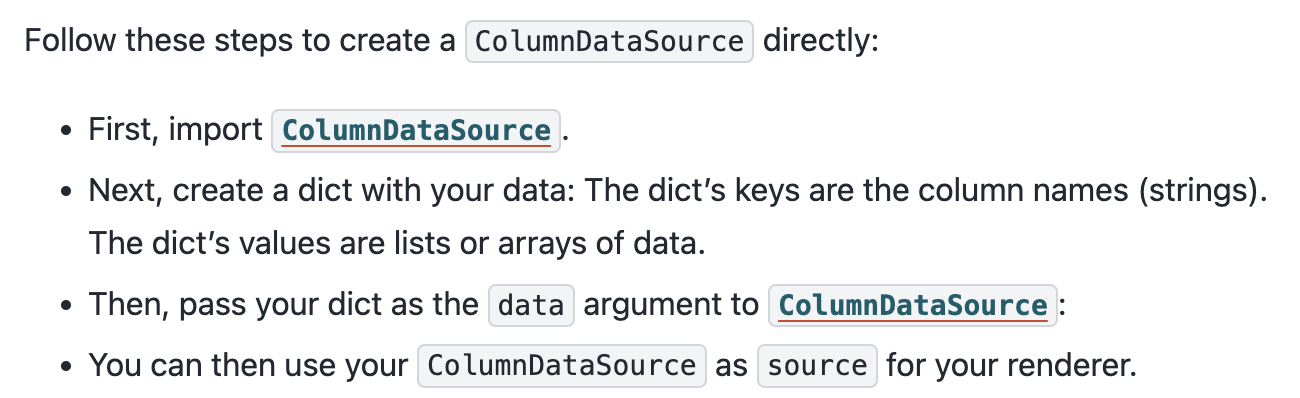


In [48]:
# The x axis will be the GDP per year while the y axis will be the carbon dioxide emissions for 1964:
data_1964={
    'x': data.gdp[data['year'] == 1964],
    'y': data.co2[data['year'] == 1964],
    'country': data.country[data['year'] == 1964],
    'region': data.region[data['year'] == 1964]}

source = ColumnDataSource(data_1964)

NameError: name 'ColumnDataSource' is not defined

In [ ]:
data_1964

In [ ]:
p2 = figure(
    title='CO2 Emissions vs GDP in 1964',
    height=600, 
    width=1000)

p2.scatter(
    x='x', 
    y='y', 
    fill_alpha=0.8, 
    source=source,
    size=7)

p2.xaxis.axis_label = 'Income Per Person'

p2.yaxis.axis_label = 'CO2 Emissions (tons per person)'

show(p2)

In [ ]:
# Topics to be covered on May 25 and 26
# Widgets from Bokeh
# Plotly
# Tableau
# SQL Primer in Python
